### Quest
- 분석 대상 : 성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
- 단일 변수 chart 각각 작성
- 이상치와 결측치가 없는 데이터셋 만들기

In [177]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np

In [178]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:5]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


In [179]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [180]:
df_ROS.isnull()

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1890,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1891,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1892,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [181]:
df_ROS_drops = df_ROS.dropna()
df_ROS_drops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 1216
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              162 non-null    int64  
 1   환자ID                    162 non-null    object 
 2   Large Lymphocyte        162 non-null    float64
 3   Location of herniation  162 non-null    int64  
 4   ODI                     162 non-null    float64
 5   가족력                     162 non-null    float64
 6   간질성폐질환                  162 non-null    int64  
 7   고혈압여부                   162 non-null    int64  
 8   과거수술횟수                  162 non-null    int64  
 9   당뇨여부                    162 non-null    int64  
 10  말초동맥질환여부                162 non-null    int64  
 11  빈혈여부                    162 non-null    int64  
 12  성별                      162 non-null    int64  
 13  스테로이드치료                 162 non-null    int64  
 14  신부전여부                   162 non-null    i

In [182]:
df_ROS_drops.describe()

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추전방위증
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,392.512346,40.742593,2.549383,30.611111,0.086420,0.024691,0.067901,0.216049,0.055556,0.0,...,2060.549568,0.314815,45.619136,16.054938,15.231111,0.030864,-1.536790,1979.197222,3.962963,0.012346
std,298.997959,13.136057,0.919441,10.817084,0.281854,0.155664,0.252356,0.531249,0.229772,0.0,...,526.440930,0.743270,9.676375,8.592999,13.892825,0.173486,0.498315,320.372075,0.367785,0.110766
min,0.000000,6.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1021.000000,0.000000,14.000000,1.500000,-1.800000,0.000000,-2.740000,1209.500000,2.000000,0.000000
25%,111.500000,31.800000,2.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1704.000000,0.000000,39.525000,9.650000,9.050000,0.000000,-1.815000,1753.100000,4.000000,0.000000
50%,472.000000,42.800000,3.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2012.850000,0.000000,44.700000,14.200000,13.650000,0.000000,-1.520000,1970.700000,4.000000,0.000000
75%,573.500000,48.175000,3.000000,37.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2409.350000,0.000000,51.600000,20.400000,19.900000,0.000000,-1.262500,2155.300000,4.000000,0.000000
max,1216.000000,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.0,...,3755.400000,3.000000,76.200000,48.700000,165.000000,1.000000,1.400000,3088.000000,5.000000,1.000000


In [183]:
df_ROS_drops.describe(include=object)

,환자ID,직업,수술기법,혈액형,척추이동척도
count,162,162,162,162,162
unique,162,16,2,4,4
top,1PT,사무직,TELD,RH+A,Middle
freq,1,53,155,58,94


In [184]:
df_ROS_drops['직업'].value_counts()

사무직      53
자영업      19
주부       15
노동직      11
학생       10
군인       10
운수업       7
의료직       7
사업가       6
농업        6
교사        5
무직        4
운동선수      3
공무원       3
특수전문직     2
예술가       1
Name: 직업, dtype: int64

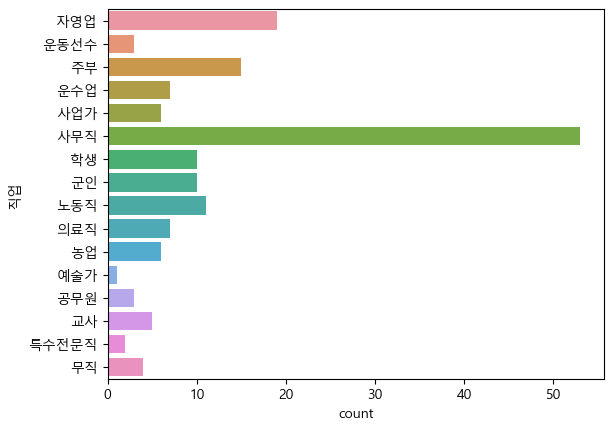

In [185]:
sns.countplot(data=df_ROS_drops, y='직업')
plt.show()

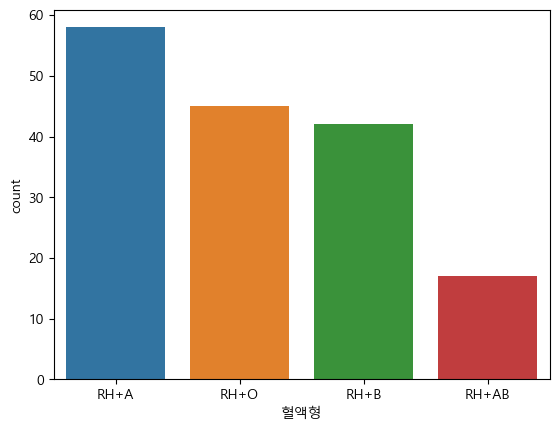

In [186]:
sns.countplot(data=df_ROS_drops, x='혈액형')
plt.show()

In [187]:
df_ROS_drops.describe().columns

Index(['Unnamed: 0', 'Large Lymphocyte', 'Location of herniation', 'ODI',
       '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부',
       '통증기간(월)', '수술시간', '수술실패여부', '수술일자', '재발여부', '전방디스크높이(mm)',
       '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI',
       'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치',
       '척추전방위증'],
      dtype='object')

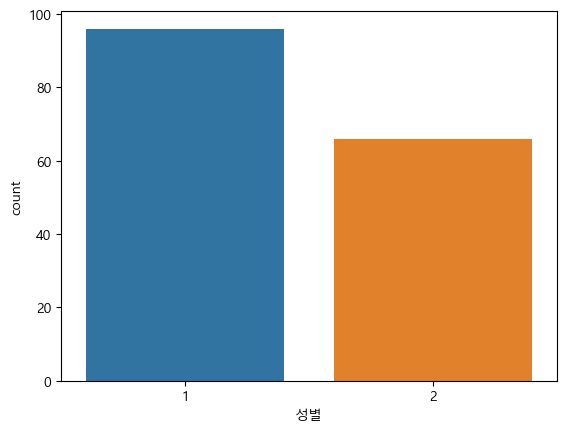

In [188]:
sns.countplot(data=df_ROS_drops, x='성별')
plt.show()

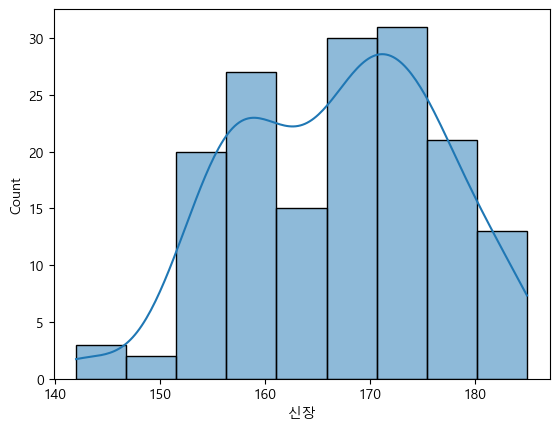

In [189]:
sns.histplot(data=df_ROS_drops,kde=True, x='신장')
plt.show()

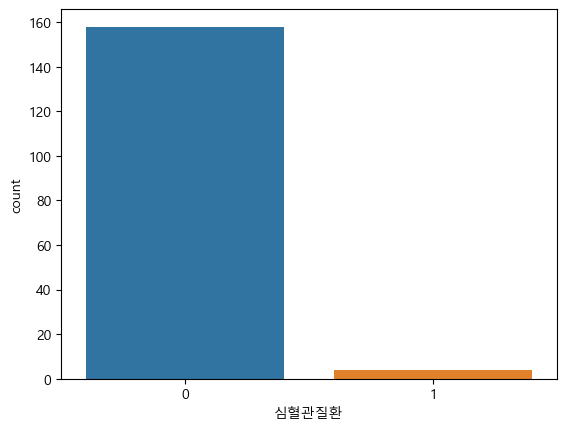

In [190]:
sns.countplot(data=df_ROS_drops, x='심혈관질환')
plt.show()

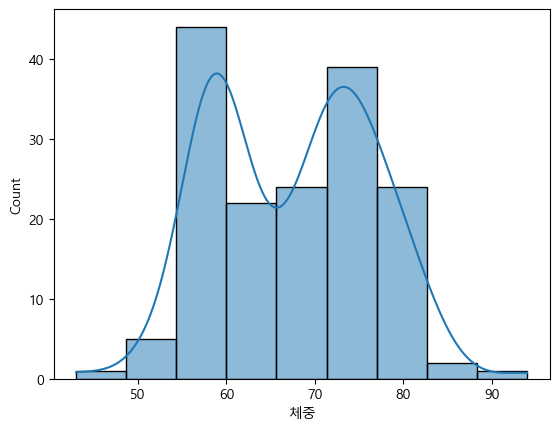

In [191]:
sns.histplot(data=df_ROS_drops,kde=True, x='체중')
plt.show()

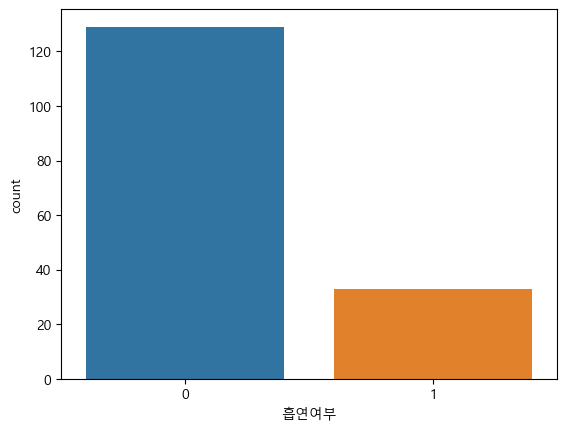

In [192]:
sns.countplot(data=df_ROS_drops, x='흡연여부')
plt.show()

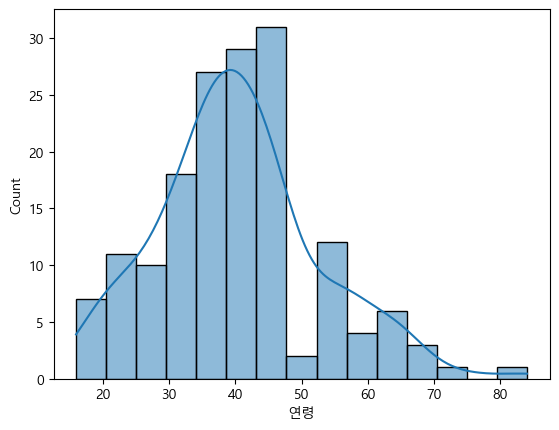

In [193]:
sns.histplot(data=df_ROS_drops,kde=True, x='연령')
plt.show()

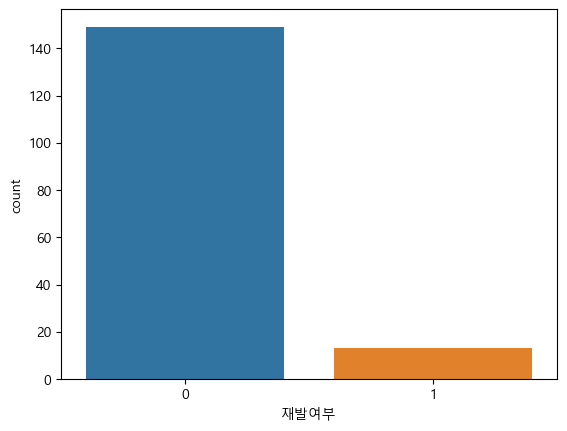

In [194]:
sns.countplot(data=df_ROS_drops, x='재발여부')
plt.show()

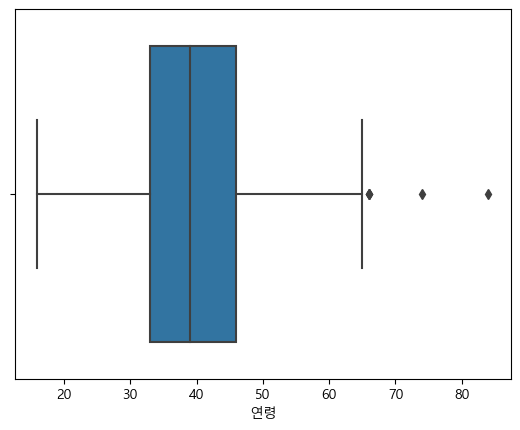

In [195]:
sns.boxplot(data=df_ROS_drops, x='연령')
plt.show()

In [196]:
df_ROS_drops['연령'].value_counts()

37    10
46     9
39     9
40     8
47     8
41     7
44     7
56     7
45     7
36     6
35     6
38     5
29     5
33     4
34     4
30     4
64     3
20     3
21     3
43     3
66     3
31     3
32     3
28     3
22     3
54     3
19     2
24     2
55     2
25     2
52     2
42     2
26     1
74     1
58     1
17     1
23     1
63     1
60     1
61     1
62     1
57     1
16     1
84     1
65     1
27     1
Name: 연령, dtype: int64

In [197]:
Q1 = df_ROS_drops['연령'].describe()['25%']
Q3 = df_ROS_drops['연령'].describe()['75%']
IQR = Q3 - Q1

In [198]:
Q1,Q3, IQR

(33.0, 46.0, 13.0)

In [199]:
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
bound_low,bound_up

(13.5, 65.5)

In [200]:
condition = (df_ROS_drops['연령'] <= bound_up) #긍정 조건 변환
condition

0       False
1        True
3        True
11       True
15      False
        ...  
989      True
992      True
1019     True
1031    False
1216     True
Name: 연령, Length: 162, dtype: bool

In [201]:
df_ROS_condition = df_ROS_drops[condition]

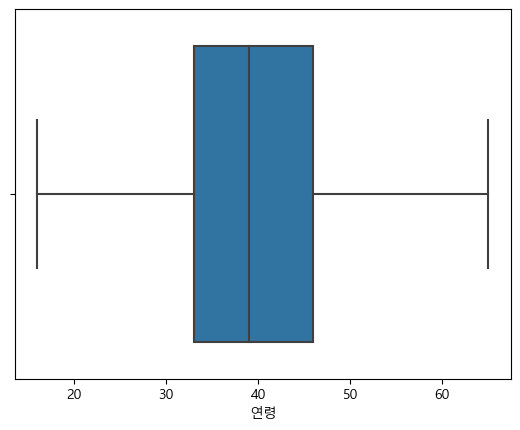

In [202]:
sns.boxplot(data=df_ROS_condition, x='연령')
plt.show()

In [211]:
df_ROS_condition['연령'].describe()

count    157.000000
mean      39.464968
std       10.852466
min       16.000000
25%       33.000000
50%       39.000000
75%       46.000000
max       65.000000
Name: 연령, dtype: float64

In [212]:
condition3 = (df_ROS_condition['연령']>=df_ROS_condition['연령'].describe()['50%']) &(df_ROS_condition['연령']<=df_ROS_condition['연령'].describe()['75%'])

In [213]:
df_ROS_drops_agecount = df_ROS_condition['연령'].loc[condition3]

In [214]:
df_ROS_drops_agecount.value_counts().sum()

52

# option : 중앙값부터 Q3까지 인원 : 52명